# Using age, cholesterol, maximum heart rate and resting blood pressure to classify heart disease patients from Cleveland #

**John Mao, Caitlyn Chan, Ritaksha Roy Burman and Farida Fakhry Mohamed Ahmed Altahtawy**


### Introduction ###
Cardiovascular heart diseases are the leading cause of death worldwide, accounting for an estimated 17.9 million casualties each year according to the [WHO.](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1)

Our project seeks to use age, cholesterol, maximum heart rate and resting blood pressure to diagnose individuals with coronary artery disease, (CAD). CAD occurs when the arteries that deliver blood to the heart are reduced in diameter due to plaque buildup (CDC, 2021).

The goal of this project is to classify patients of whether they have CAD for preventative interventions.

The question we wish to answer is: 
**How well can we predict a patient will have coronary artery disease based on age, cholesterol levels, resting blood pressure and maximum heart rate achieved?**

To answer this, we are using the [Cleveland heart disease](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data) database.

We are then comparing this to the [Long Beach heart disease](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data) database.

### Expected Outcomes and Significance ##
We expect to see a positive trend with resting blood pressure and age. We also expect to see that on average, those  with heart diseases will have higher blood pressures.
We wish to explore how sex impacts an individual's potential risk.

This data anaylsis could be advantageous to enhance timely diagnosis of cardiovascular disease to help implement interventions and recognize risk factors. 


**Database description table**

|variable | units | desription |
|-------- | ----- | ---------- |
| chol | mg/dl | serum cholestrol |
| age | years | N/A |
| trestbps | mmHg | resting blood pressure (on admission to hospital) |
| num | N/A | 0 = unafflicted by disease, (1,2,3,4) showing presense of heart disease. |
| thalach | N/A | maximum heart rate achieved (bpm) |
| diagnosis | N/A | Diagnosis will be true or false relating to num |

figure 1


### Methods ### 
**1. Preprocessing and exploratory data analysis**

In this step, we importing libraries and the ```heart_data``` dataset from the web. We cleaned and tided the data and added a new column, ```diagnosis```. We also split the data into training and testing sets, and used the testing set at the end of our analysis to determine the reliability of our classifier. We also visualized the relationship between our predictor variables to see how the data is distributed. 

We also generated a summary table of our training data to check for balancing of  ```diagnosis``` 

**2. Visualizing our training data**

This allowed us to gain a greater understanding of how our data was distributed among our chosen predictor variables. 

**3. Finding the best K number of neighbors**

In this step, we used the ```recipe``` function to standardize the data. We generated a k-nearest neighbors (KNN) model with ```neighbors = tune()``` and performed a cross validation using 10 folds on our training data. We added our recipe and KNN model to a workflow and collected the metrics to filter for accuracy for values of k. 


**4. Testing our classifier**

Generated a majority classifier of our data and evaluated the classifier's prediction accuracy by generating a confusion matrix. Generated a confusion matrix to determine the accuracy of our classifier on new data from a Long Beach VA dataset.




    

### Preliminary exploratory data analysis ###
We have 303 total rows of data amongst our 5 variables with no observations that contain missing data.



**Importing Libraries**

In [3]:
# importing libraries 
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(RColorBrewer)

# formatting tables
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**Importing and reading the data set from the web**

In [4]:
# cleveland heart data
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data 

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1   67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
2   67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
3   37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0 
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮   ⋮   
300 57  1   4  130      131  0   0       115     1     1.2     2     1.0 7.0 
301 57  0   2  130      236  0   2       174     0     0.0     2     1.0 3.0 
302 38  1   3  138      175  0   0       173     0     0.0     1     ?   3.0 
    num
1   2  
2   1  
3   0  
⋮   ⋮  
300 3  
301 1  
302 0

figure 2

## Cleaning and wrangling the data and splitting the data into training and testing sets

To tidy the data, we have changed ```num``` (presense of heart disease) to factors. ```num``` uses integers 1 to 4 to determine diagnosis of CAD, thus we have created a new column which sets presence of heart disease (```num``` > 0) to TRUE and absence (```num``` = 0) to FALSE. 

The datarame has been split into a training and testing set. The data is stratified by the categorical variable, ```diagnosis```. 

We will split our dataframe into 75% training and 25% testing. Splitting our dataframe by these proportions allow for us to keep enough datapoints to later apply our model to our testing dataset. 

In [5]:
# set the seed 
set.seed(1)

# cleaning and wrangling the data frame, selecting relevant columns
heart_data_clean <- heart_data |>
select(chol, trestbps, age, sex, thalach, num) |>
mutate(diagnosis = as.factor(ifelse(is.na(num), NA, (num>0)))) |>
mutate(sex = as_factor(sex))|>
mutate(sex = fct_recode(sex, "Male" = "1", "Female" = "0")) |>
mutate(num = as_factor(num)) 

# splitting data into training data set and testing data set 
heart_split <- initial_split(heart_data_clean, prop = 0.75, strata = num)

heart_testing <- testing(heart_split)
heart_training <- training(heart_split)

heart_training
print(paste("Total rows", nrow(heart_data_clean)))
print(paste("Rows with missing data", sum(is.na(heart_data_clean))))



chol trestbps age sex    thalach num diagnosis
1   250  130      37  Male   187     0   FALSE    
2   236  120      56  Male   178     0   FALSE    
3   263  120      44  Male   173     0   FALSE    
⋮   ⋮    ⋮        ⋮   ⋮      ⋮       ⋮   ⋮        
223 205  128      55  Female 130     3   TRUE     
224 176  164      59  Male    90     3   TRUE     
225 131  130      57  Male   115     3   TRUE

[1] "Total rows 302"
[1] "Rows with missing data 0"


figure 3

We felt that a 75/25 split between the training and testing data was a good balance and resulted in sufficient performance. Out of the 303 rows of total data, 228 rows belonged to training and 75 to testing from our initial split.

## Summarizing the Training Data

Before we visualize and begin our prediction analysis, we need to check that the two predictor classes are balanced so that one class prediction is not favored over the other.

To summarize, we grouped by ```diag``` and used the ```n``` function to count the number of observations in each ```diag``` group.

In [6]:
heart_summary_table <- heart_training |>
                    group_by(diagnosis) |>
                    summarize(count = n()) |>
                    arrange(-count)
heart_summary_table

diagnosis count
1 FALSE     123  
2 TRUE      102

figure 4

Based off the above summary table, the counts for TRUE and FALSE heart disease diagnoses are roughly balanced in the training set. 

## Visualizing the relationships between our chosen predictor variables and the class variable



In [7]:
options(repr.plot.width = 12, repr.plot.height = 5)
# Plot the training data

heart_plot1 <- heart_training |> 
            ggplot(aes(x= age, y= trestbps, color = diagnosis)) +
            geom_point()+ 
            labs(x= "Age", y = "Resting Blood Pressure \n (mm Hg)", fill = "Diagnosis of Heart Disease", color = "Diagnosis of Heart Disease", title = "Resting Blood Pressure versus Age", num = "Diagnosis of Heart Disease")+ # rename false and true 
            theme(text = element_text(size = 12))+
            theme(plot.title = element_text(hjust = 0.5)) +
            scale_color_manual(values = c("darkorange", "steelblue"))

heart_plot2 <- heart_training |>
            mutate(num = ifelse(num == 0, FALSE, TRUE)) |>
            ggplot(aes(x = age, y = chol, color = num)) + 
            geom_point() +
            labs(num = "Diagnosis of Heart Disease",
           color = "Diagnosis of Heart Disease",
           title = "Cholesterol Levels (mg/dl) versus Age based on Sex",
           y = "Cholesterol (mg/dl)", x= "Age (years)") +
            theme(text = element_text(size = 13)) +
            scale_size_discrete(range = c(1, 2)) +
            facet_grid(cols = vars(sex))+
            theme(plot.title = element_text(hjust = 0.5)) +
            scale_color_manual(values = c("darkorange", "steelblue"))

heart_plot3 <- heart_training |> 
            ggplot(aes(x= chol, y= thalach, color = diagnosis)) +
            geom_point()+ 
            labs(x= "Cholestrol (mg/dl)", y = "Maximum heart rate achieved (bpm)", fill = "Diagnosis of Heart Disease", color = "Diagnosis of Heart Disease", title = "Maximum Heart Rate (bpm) versus Cholestrol (mg/dl)", num = "Diagnosis of Heart Disease")+ # rename false and true 
            theme(text = element_text(size = 12)) +
            theme(plot.title = element_text(hjust = 0.5)) +
            scale_color_manual(values = c("darkorange", "steelblue")) 




Warning message:
“Using size for a discrete variable is not advised.”


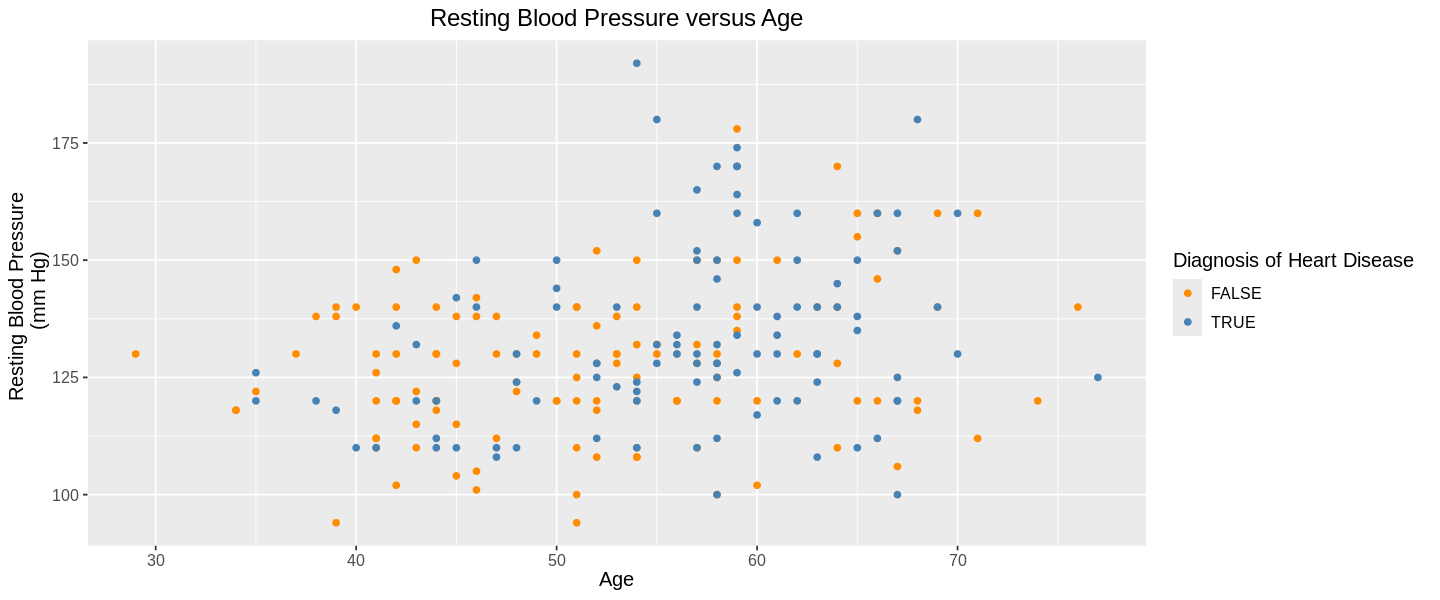

In [8]:
heart_plot1

figure 5

There is no obvious positive or negative correlation of Age and Resting Blood Pressure in terms of heart disease as many diagnosis are false as well as true and there is no direct pattern seen. It can be seen that as Age increases Resting Blood Pressure increases.

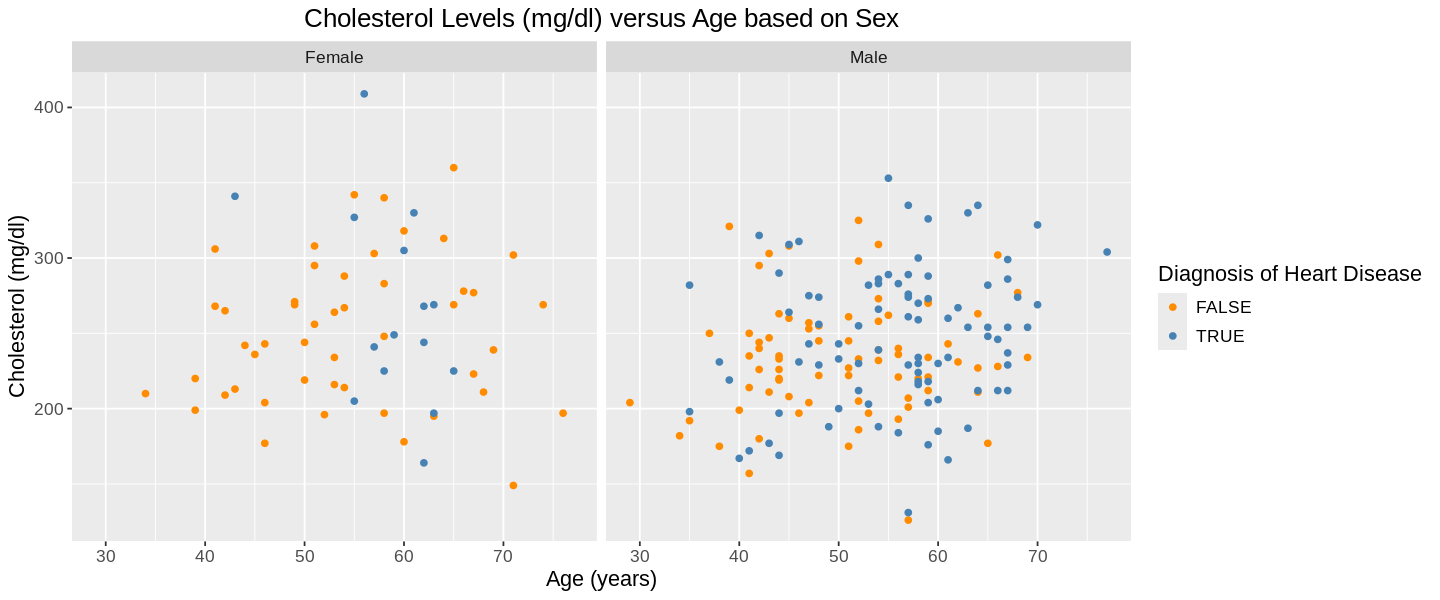

In [9]:
heart_plot2

figure 6

We can see the comparison between sexes in terms of their cholestrol and Age and how it relates to heart disease. Females show less amount of heart disease diagnosis relatively than men and as the age progresses, the cholestrol levels increase. Males on the other hand show more diagnosis of heart diseases and there cholestrol levels stay more or less constant as age progresses.

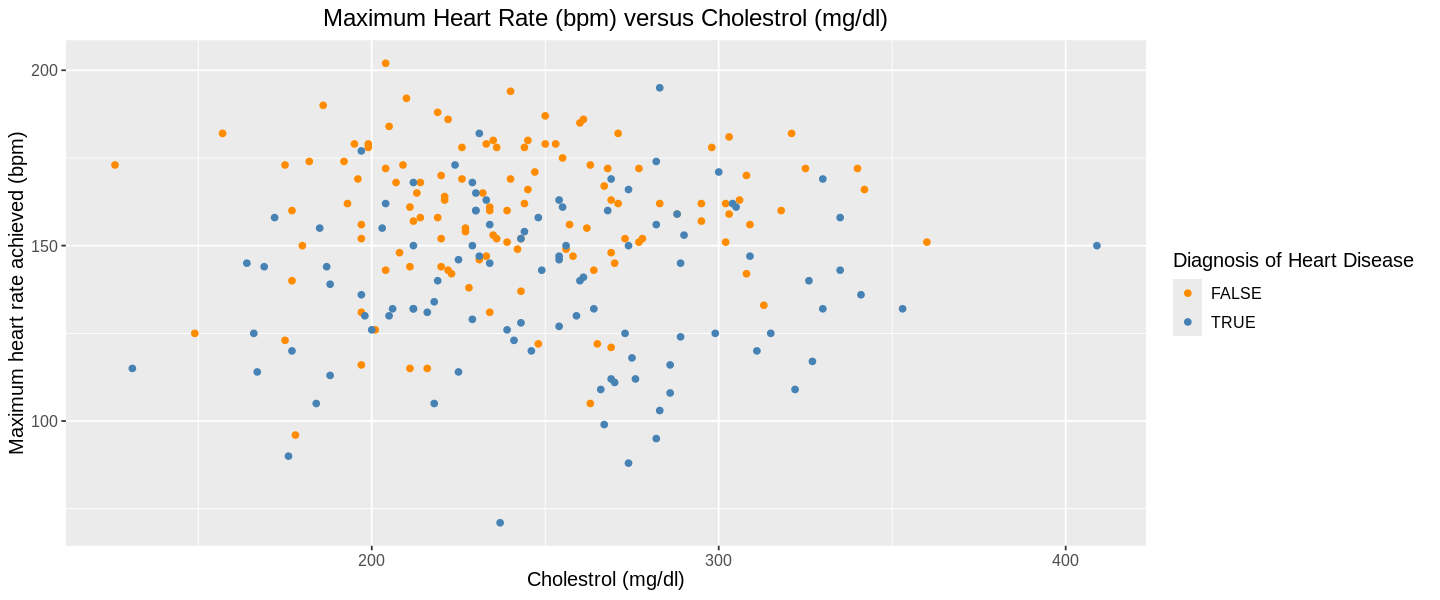

In [10]:
heart_plot3

figure 7

We can observe how maximum heart rate achieved (thalach) and cholestrol relate to each other. Looking at the graph we can presume that lower cholestrol can have high thalach and their is a no correlation of diagnosis in this plot.

## Standardizing training data and creating K-nearest neighbor model with tuning

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

# Create a recipe with the chosen predictor variables, standardize
heart_recipe <- recipe(diagnosis ~ chol + thalach + trestbps + age, data = heart_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

# create a K-nearest neighbor model specification with tuning on the number of neighbors 
spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification") 

#10-fold cross validation 
heart_vfold <- vfold_cv(heart_training, v = 10, strata = diagnosis)
gridvals <- tibble(neighbors = c(1:190))


# create a workflow analysis
knn_results <- workflow() |>
                add_recipe(heart_recipe) |>
                add_model(spec) |>
                tune_grid(resamples = heart_vfold, grid = gridvals) |>
                collect_metrics()  


## Parameter value selection to choose the number of K neighbors 


In [22]:
# Filter metrics for accuracy 
heart_best_k <- knn_results |>
                filter(.metric == "accuracy") |>
                select(neighbors, mean) |>
                arrange(-mean) |>
                mutate(mean = 100*mean)|> # Mutating accuracies_lots to show % accuracy
                arrange(desc(mean))

head(heart_best_k)

neighbors mean    
1 23        69.39888
2 24        69.39888
3 17        69.32312
4 18        69.32312
5 83        69.32312
6 84        69.32312

figure 8

In [ ]:
# Creating K-nearest neighbor model specification with 23 neighbors
spec_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 23) |>
        set_engine("kknn") |>
        set_mode("classification") 
# Defining workflow using spec_best_k and fitting to training data 
knn_best_results <- workflow() |>
                add_recipe(heart_recipe) |>
                add_model(spec_best_k) |>
                fit(data = heart_training)
# Generating predictions to be used in confusion matrix
heart_predictions <- predict(knn_best_results, heart_testing) |>
                    bind_cols(heart_testing) |>
                    select(diagnosis, .pred_class)


It is clear from the table (figure 8) that the K value which provides the highest accuracy of 68.82% is given by 23 neighbors. However, we also wish to confirm this by visualizing the cross validation accuracy.

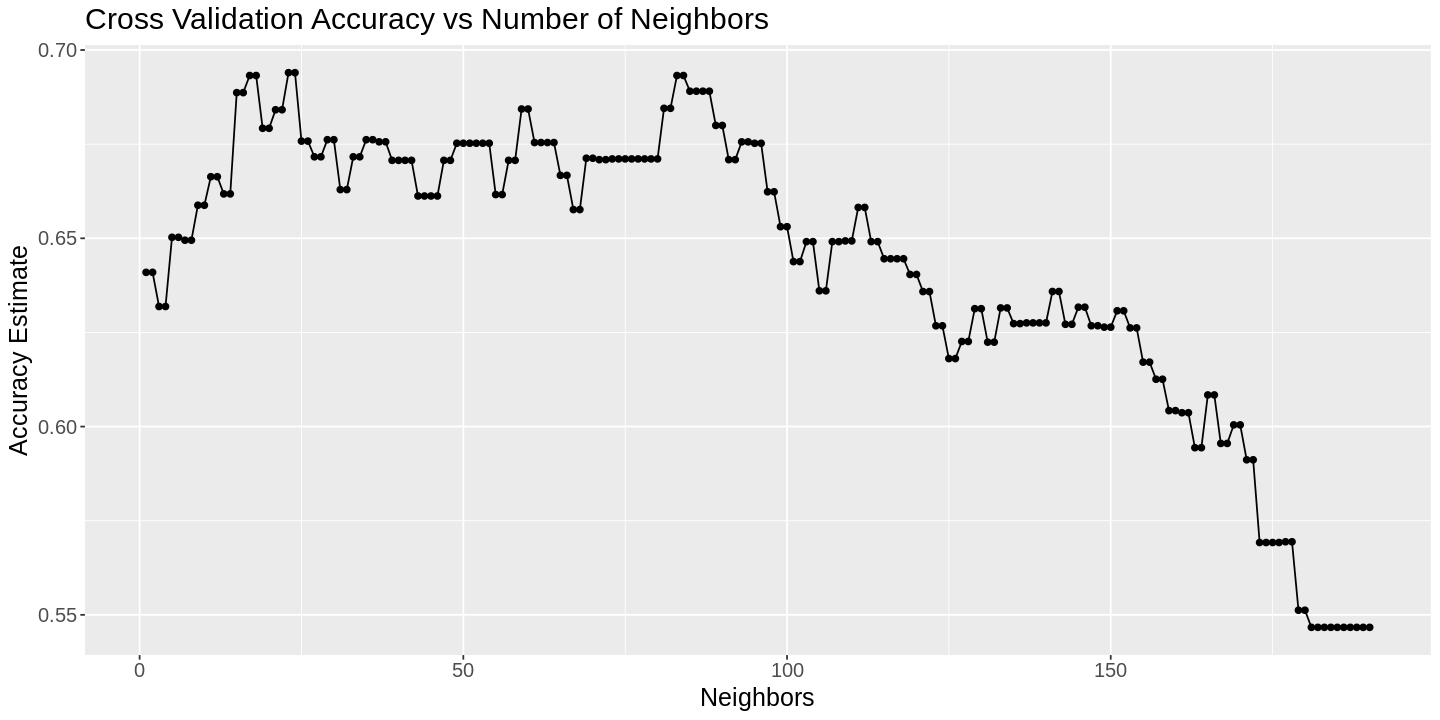

In [13]:
# Visualize k accuracy 
cross_val_plot <- accuracies_lots |> # accuracies
                ggplot(aes(x= neighbors, y = mean))+
                geom_point() +
                geom_line() +
                labs(x= "Neighbors", y = "Accuracy Estimate")+
                ggtitle("Cross Validation Accuracy vs Number of Neighbors")+
                theme(text = element_text(size = 15)) 
cross_val_plot

figure 9

Based on the graph above, setting the number of neighbors to $K =$ 23 provides the hgihest cross validation accuracy estimate. Further, Figure 9 shows that the estimated accuracy changes by only a small amount if we increase or decrease $K$ near $K =$ 23. Finally, $K =$ 23 does is not prohibitevely expensive in terms of computational costs of training. Therefore, we select $K =$ 23 for the classifier. 

## Testing our classifier using the confusion matrix 

In [14]:
# Confusion matrix of K nearest neighbors using K=23
heart_conf_mat <- heart_predictions |>
                conf_mat(truth = diagnosis, estimate = .pred_class)

heart_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE    31   20
     TRUE      9   17

From our confusion matrix, our model shows:

|           | % |
|-----------|---|
| Accuracy  |  74.03 |
| Precision |  56.76 |
| Recall    |  84 |


figure 10

From the confusion matrix, we observe a noticeable difference between the precision and recall. In the context of our heart disease diagnosis, prioritizing a higher recall makes sense as we want to minimize the risk of missing true positive cases. Even though our approach may include more false positive, further testing can ensure that afflicted patients receive the necessary care.

## Comparing to the majority classifier 

In [15]:
# Finding the % of majority classifier
heart_major <- heart_training |>
            group_by(diagnosis) |>
            summarise(n=n()) |>
            mutate(percent = 100*n/nrow(heart_training))

heart_major

diagnosis n   percent 
1 FALSE     123 54.66667
2 TRUE      102 45.33333

figure 11

The majority classifier of our data set is 54.87% of patients having no diagnosis of heart disease. Our model using 23 neighbors provides us an accuracy of 74.03% on the Cleveland testing dataset. We observe a 34.92% relative increase over the baseline.



## Checking our model for over fitting and underfitting 

We will check if our model over or underfits the data by visualizing the regions the model has assigned to the two classes of diagnoses. This will help us to determine if our model is reliable to predict on new data. 

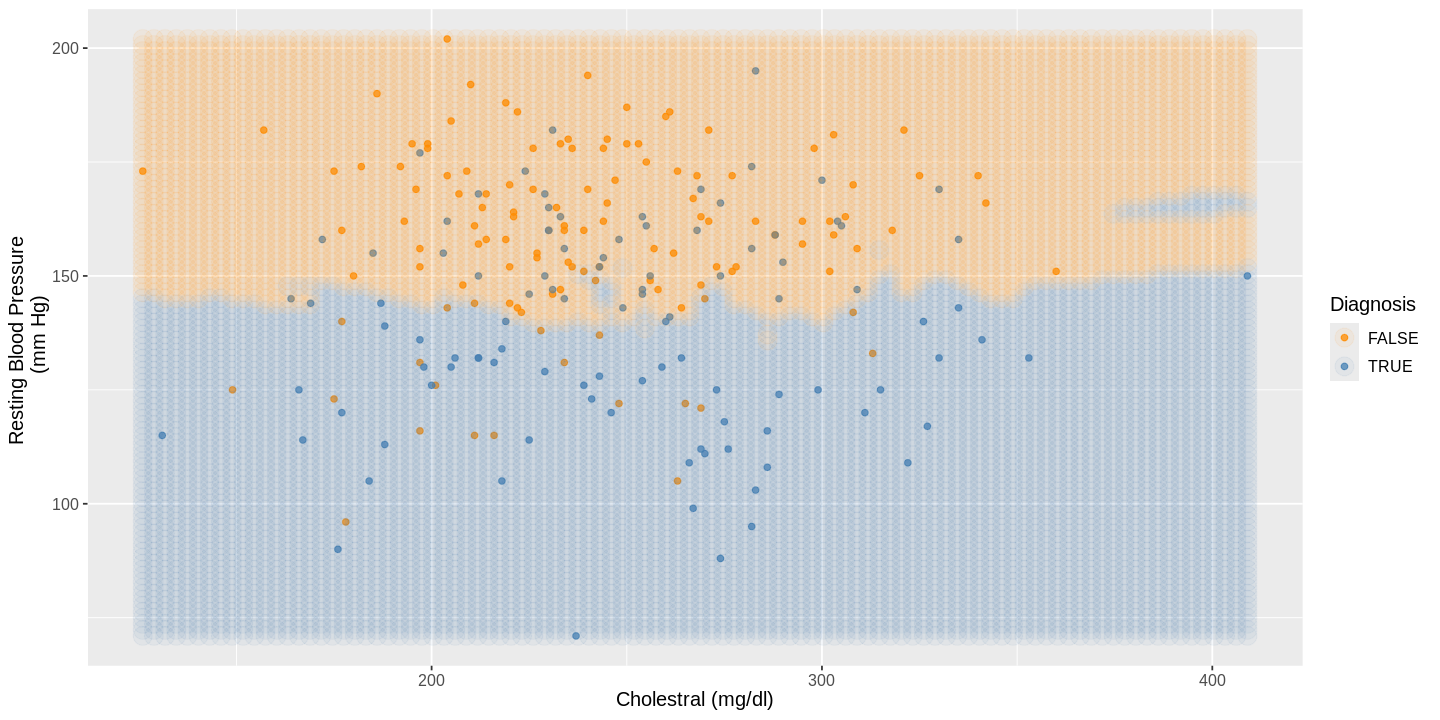

In [16]:
heart_recipe_2 <- recipe(diagnosis ~ chol + thalach, data = heart_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
knn_fitted <- workflow() |>
        add_recipe(heart_recipe_2) |>
        add_model(spec_best_k) |>
        fit(data = heart_training)

thalach_grid <- seq(min(heart_training$thalach), 
                max(heart_training$thalach), 
                length.out = 100)

chol_grid <- seq(min(heart_training$chol), 
                max(heart_training$chol), 
                length.out = 100)
asgrid <- as_tibble(expand.grid(thalach = thalach_grid,
                                chol = chol_grid))
# Use the fitted workflow generated earlier to make predictions at the grid points 
knnPredGrid <- predict(knn_fitted, asgrid)

prediction_heart_table <- bind_cols(knnPredGrid, asgrid) |>
                        rename(diagnosis = .pred_class)

# Generate a plot, coloring the scatter points from the original data and including a faded colored scatter for the grid points. 


wkflw_plot <- ggplot() +
geom_point(data = heart_training, mapping = aes(x= chol, y= thalach, color = diagnosis), alpha = 0.75) +
geom_point(data = prediction_heart_table, mapping = aes(x=chol, y=thalach, color =diagnosis), alpha = 0.06, size = 5) +
labs(color = "Diagnosis", x = "Cholestral (mg/dl)", y = "Resting Blood Pressure \n (mm Hg)") +
scale_color_manual(values = c("darkorange", "steelblue")) +
theme(text = element_text(size = 12))
wkflw_plot

figure 12

Looking at the graph above, setting the number of neighbors to $K =$ 23 provides the highest cross-validation accuracy estimate (%). Further, Figure 8 shows that the stimated accuracy changes only by a small amount if we increase or decrease $K$ near $K$ = 23. Finallym $K$ is not too latge that it would create a prohibitvely expensive cost to train our model. Considering this justification, we select $K =$ 23 for the classifier.

Looking at the graph above, the classifier is not overfitting or underfitting. This allows us to make the conclusion that our model does not generalizes well to new data. 

## Testing the versatility of our classifier through comparison with Long Beach VA data

**Reading and wrangling the data from long beach**

We apply the same methods for cleaning the long beach dataset as we did with the Cleveland dataset.

In [17]:
longbeach_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = FALSE)

# cleaning and wrangling Long Beach VA data frame

colnames(longbeach_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

longbeach_data_cleaned <- longbeach_data |>
select(chol, trestbps, age, sex, thalach, num) |>
mutate(diagnosis = ifelse(is.na(num), NA, (num>0))) |>
mutate(sex = as_factor(sex))|>
mutate(sex = fct_recode(sex, "Male" = "1", "Female" = "0")) |>
mutate(num = as_factor(num)) |>
mutate(diagnosis = as_factor(diagnosis)) |>
mutate(thalach = as.double(thalach)) |>
mutate(trestbps = as.double(trestbps)) |>
mutate(chol = as.double(chol))|>
na.omit() 
longbeach_data_cleaned

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X7, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `thalach = as.double(thalach)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `trestbps = as.double(trestbps)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `chol = as.double(chol)`.
Caused by warning:
! NAs introduced by coercion”


chol trestbps age sex    thalach num diagnosis
1   260  140      63  Male   112     2   TRUE     
2   209  130      44  Male   127     0   FALSE    
3   218  132      60  Male   140     2   TRUE     
⋮   ⋮    ⋮        ⋮   ⋮      ⋮       ⋮   ⋮        
138 333  127      54  Female 154     1   TRUE     
139 223  122      55  Male   100     2   TRUE     
140 254  120      62  Male    93     1   TRUE

figure 13

In [20]:
# Finding the % of majority classifier
long_major <- longbeach_data_cleaned |>
            group_by(diagnosis) |>
            summarise(n=n()) |>
            mutate(percent = 100*n/nrow(longbeach_data_cleaned))

long_major

diagnosis n   percent 
1 FALSE      32 22.85714
2 TRUE      108 77.14286

figure 14


In [21]:
longbeach_predictions <- predict(knn_best_results, longbeach_data_cleaned) |>
                      bind_cols(longbeach_data_cleaned) |> 
                      select(diagnosis, .pred_class)

# Generating a confusion matrix of the long Beach predictions
longbeach_conf_mat <- longbeach_predictions |>
                conf_mat(truth = diagnosis, estimate = .pred_class)

longbeach_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     8   14
     TRUE     24   94

figure 15

### Testing our classifier against Long Beach's majority classifier
|           | % |
|-----------|---|
| Accuracy  |73.86   |
| Precision |83.04  |
| Recall    |79.66   |

From the confusion matrix, we observe that our accuracy is fairly consistent between datasets. However, our model sees a lower accuracy than the majority classifier of Long Beach. This may be a result of Long Beach's data set having much more NA values, skewing the majority classifier further towards positive diagnosises. The increase in NA values may be due to a lack of further testing in those who are unafflicted as opposed to Cleveland.


## Discussion

### Answering the predictive question:
We are using our predictive model to answer the question of “How well can we predict a patient will have coronary artery disease based on age, cholesterol levels, resting blood pressure and maximum heart rate achieved?” This was answered by developing a classifier that diagnosed coronary artery disease using age, cholesterol levels, resting blood pressure and maximum heart rate achieved, which was able to predict diagnoses with relatively high accuracy.

### Expected findings and summary of outcomes

As expected, we observed a positive trend with resting blood pressure and age. This is due to the fact that aging causes structural changes in the arteries like arteriosclerosis, which contributes to the rise in blood pressure with age (National Institute on aging, 2022). We expected that those with cardiovascular diseases tend to have higher blood pressures, and according to Fuchs & Whelton (2019), high blood pressure is a predominant risk factor for heart diseases such as heart failure, coronary artery disease and more.

The visualizations showed that patients diagnosed with heart disease by the classifier exhibited high levels of cholesterol and maximum heart rates. This aligns with research indicating maximal heart rate as a strong, long-term predictor of cardiovascular mortality and a significant risk factor for coronary artery disease risk (Sandvik et al., 1995).

We also expected our classification model to have high accuracy, especially considering the significance and potential implications of this in a medical context. The clustering of data points for each diagnosis seen in visualizations between the predictors and target variables suggested a relatively strong correlation with the target variable, which indicated high accuracy. This was then confirmed using the confusion matrix which indicated our model had an accuracy of 74%, with a higher recall (84%) than precision (57%). This has significant implications as it ensures a high accuracy in diagnosing patients, a decreased risk of missing true positives and providing the necessary medical treatment to those affiliated.

### Impact of such findings:

The impact of these results affects two key areas, clinical implications and public health policies. Identifying correlations between risk factors and heart disease can aid in early detection, risk assessment and treatment planning for patients, along the prioritization of patients with true positives. However, given that this model’s accuracy is high but not perfect, it best serves as a preliminary diagnostic tool before seeking confirmation from healthcare professionals to mitigate the risk of fatal misdiagnosis. Moreover, insights from such findings can inform public health policies aimed at reducing the presence of heart disease, where targeted interventions, screening programs and lifestyle modifications can be implemented based on the identified risk factors.

### Future questions could this lead to: 

1. Which factors exert the greatest influence on the diagnosis of coronary artery disease?
2. What are the possible preventative measures individuals can undertake to minimize the risk of heart disease?
3. What are the relationships between heart diseases and other risk factors?
4. What is the relationship between age and sex impact heart disease?
5. Could data-driven predictive models be developed to forecast future cardiovascular events based on age, cholesterol levels, and blood pressure?d.re?kk

### Bibliography ### 

Detrano, R., Janois, A., Steinbrunn, W., Pfisterer, Matthias., Schmid, Johann-Jakob., Sandhu, S., Guppy, KH., Lee, S., Froelicher, V. (1988). International Application of a New Probability Algorithm for the Diagnosis of Coronary Artery Disease. *The American Journal of Cardiology*, 64(1), 304-309.  https://doi.org/10.24432/C52P4X.

Coronary Artery Disease. (2021, July 19). Centers for Disease Control and Prevention (CDC). https://www.cdc.gov/heartdisease/coronary_ad.htm


Janosi, A ., Steinbrunn, W., Pfisterer, M., and Detrano, R. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

World Health Organization. (n.d.). https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1. 

National institute on aging. (2022, October 1). High Blood Pressure and Older Adults. National Institute on Aging. https://www.nia.nih.gov/health/high-blood-pressure/high-blood-pressure-and-older-adults#:~:text=High%20blood%20pressure%2C%20or%20hypertension

Fuchs, F. D., & Whelton, P. K. (2019). High Blood Pressure and Cardiovascular Disease. Hypertension, 75(2), 285–292. https://doi.org/10.1161/HYPERTENSIONAHA.119.14240

Burt, T., Button, K., Thom, H., Noveck, R., & Munafò, M. (2017). The Burden of the “False‐Negatives” in Clinical Development: Analyses of Current and Alternative Scenarios and Corrective Measures. Clinical and Translational Science, 10(6), 470–479. https://doi.org/10.1111/cts.12478

Sandvik, L., Erikssen, J., Ellestad, M., Erikssen, G., Thaulow, E., Mundal, R., & Rodahl, K. (1995). Heart rate increase and maximal heart rate during exercise as predictors of cardiovascular mortality. Coronary Artery Disease, 6(8), 667–680. https://doi.org/10.1097/00019501-199508000-00012

Bhatnagar, A. (2017). Environmental Determinants of Cardiovascular Disease. Circulation Research, 121(2), 162–180. https://doi.org/10.1161/circresaha.117.306458